# PEC correction

Start by importing MagmaPEC and MagmaPandas and any other packages you want to use. Here we also import Pandas for importing pressure data. For details on the use of MagmaPandas, please see it's [documentation](https://magmapandas.readthedocs.io/en/latest/).

In [1]:
import MagmaPEC as mpc
import MagmaPandas as mp

import pandas as pd

Import your melt inclusion and olivine data as magmapandas dataframes. Expected units are wt.%, and in the column headers only the first letter of each element should be capitalized. Iron is expected to be expressed as FeO (total), with column name 'FeO'.

In [ ]:
melt_file = "./data/melt.csv"
olivine_file = "./data/olivine.csv"

melt = mp.read_melt(melt_file, index_col=["name"], units="wt.%")
olivine = mp.read_olivine(olivine_file, index_col=["name"], units="wt.%")

Here's an example of the expected column header formatting:

In [3]:
print(melt.columns.values)

['SiO2' 'Al2O3' 'MgO' 'CaO' 'FeO' 'Na2O' 'K2O' 'MnO' 'TiO2' 'P2O5' 'Cr2O3'
 'CO2' 'H2O' 'F' 'S' 'Cl']


If you have data for internal inclusion pressures (in bars) you can also import those. The data need to be list-like (e.g. list, numpy array, pandas series) and if you use a pandas series you need to make sure the index matches those of the melt and olivine dataframes.

The pressures we use here were calculated previously with CO2-H2O solubility models. CO2 from the glass only was used, i.e. not from the bubble, and resulting pressures are final pressures inside the inclusions, at the end of post-entrapment crystallization.

In reality, pressures are not fixed during post-entrapment crystallisation. Olivine has a lower specific volume than silicate melt, so as inclusions crystallize olivine, their internal pressures decrease. However, many melt inclusions are trapped at high pressure (>5 kbar) and compared to that, PEC-driven pressure decreases are relatively minor (<2 kbar). Moreover, modelling pressure changes during post-entrapment crystallization is complicated and requires tight thermodynamic constraints. MagmaPEC therefore runs at fixed pressures. 

Suitable pressure options are final, post-PEC, pressures or an approximations of entrapment pressures. Entrapment pressures can be approximated by calculating CO2 saturation pressures of uncorrected inclusions with their total CO2 budgets (glass + bubble + carbonates), or by running PEC corrections iteratively. Note that the former results in overestimated saturation pressures as PEC corrections dilute inclusion CO2 concentrations. Modelled PEC extents increase with pressure. Post-PEC pressures will therefore yield slightly underestimated PEC extents, and entrapment pressures slightly overestimated PEC extents.

In [4]:
pressure_file ="./data/pressure.csv"

pressure = pd.read_csv(pressure_file, index_col = ["name"]).squeeze()

pressure

name
PI032-04-01    4104.410589
PI032-04-02    4231.966408
PI041-02-02    1956.244091
PI041-03-01    3548.843351
PI041-03-03    3500.514426
PI041-05-04    1386.274577
PI041-05-06    2512.013195
PI041-07-01    3668.361134
PI041-07-02    2449.116051
PI052-01-02    1404.218415
Name: IaconoMarziano, dtype: float64

Alternatively, if you have melt CO<sub>2</sub> (and H<sub>2</sub>O) data, you can use MagmaPandas to calculate volatile saturation pressures. First calculate temperature with some initial pressure and then iteratively calculate pressure and temperature. See the [MagmaPandas documentation](https://magmapandas.readthedocs.io/en/latest/notebooks/melt_basics.html) for more details.

The melt compositions in this example have been corrected for CO2 bubbles and the pressures calculated here are therefore overestimated approximations of inclusion entrapment pressures (see above).

In the rest of this notebook we do not use these modelled pressures, and instead use the above imported post-PEC pressures.

In [5]:
melt

,SiO2,Al2O3,MgO,CaO,FeO,Na2O,K2O,MnO,TiO2,P2O5,Cr2O3,CO2,H2O,F,S,Cl
name,,,,,,,,,,,,,,,,
PI032-04-01,50.028862,15.226979,5.330006,10.522019,8.59454,3.914280,0.730798,0.126266,2.669216,0.303542,NaN,0.658252,1.508379,0.082590,0.152337,0.035565
PI032-04-02,49.558861,16.041588,5.117479,10.266067,8.25471,3.782408,0.997826,0.129969,2.814807,0.356900,NaN,0.713472,1.412274,0.089010,0.175511,0.047265
PI041-02-02,49.112045,16.972038,4.864153,9.195718,10.07540,3.793512,1.079184,0.153456,2.807967,0.561756,NaN,0.464520,0.656341,0.047715,0.068108,0.021185
PI041-03-01,47.098515,17.448515,4.650640,12.154110,7.95402,3.707263,1.268282,0.101370,3.493271,0.611504,NaN,0.883720,0.324968,0.088070,0.096228,0.059958
PI041-03-03,46.478870,17.637102,4.762752,12.364033,7.84027,3.789446,1.294603,0.077221,3.617484,0.574248,NaN,0.910470,0.344988,0.090605,0.088145,0.061584
PI041-05-04,47.138298,17.956741,4.024120,9.080720,11.06460,4.443080,1.552079,0.137008,2.402199,0.797181,NaN,0.492738,0.445967,0.084777,0.117315,0.057016
PI041-05-06,46.501282,17.311686,4.228429,9.097128,11.04740,4.082553,1.445413,0.162975,3.707347,0.631987,NaN,0.652985,0.597560,0.109584,0.130704,0.064655
PI041-07-01,46.719250,16.933716,4.811947,10.734431,9.19577,3.480676,1.414640,0.135673,3.927458,0.616899,NaN,0.520014,1.134939,0.083496,0.181692,0.062622
PI041-07-02,46.703835,17.152630,4.807799,11.070642,9.02066,3.513364,1.498242,0.127613,3.893234,0.678595,NaN,0.409963,0.678781,0.081043,0.154646,0.063188


In [6]:
temperature = melt.temperature(P_bar = 5e3)
pressure_calc = melt.volatile_saturation_pressure(T_K=temperature)

while True:
    temperature = melt.temperature(P_bar=pressure_calc)
    pressure_calc_new = melt.volatile_saturation_pressure(T_K=temperature)
    dP = (pressure_calc_new - pressure_calc) / pressure_calc_new # calculate percentage change
    pressure_calc = pressure_calc_new.copy()
    if (dP < 0.01).all():
        # break when all pressure have converged within 1% of previous values.
        break

pressure_calc

Saturation pressure...    |█████████████████████████| 100% [10/10] in 2.6s 
Saturation pressure...    |█████████████████████████| 100% [10/10] in 2.3s 
Saturation pressure...    |█████████████████████████| 100% [10/10] in 2.3s 


name
PI032-04-01    6152.773380
PI032-04-02    6822.817783
PI041-02-02    4801.389400
PI041-03-01    6957.131799
PI041-03-03    6825.409494
PI041-05-04    4012.681954
PI041-05-06    5267.599946
PI041-07-01    4966.863409
PI041-07-02    4174.413404
PI052-01-02    2387.565435
dtype: float64

Here we will also use a whole-rock dataset to set up a model for predicting the initial FeO contents of our melt inclusions. For explanation of this model, follow the [Initial FeO prediction](https://magmapec.readthedocs.io/en/latest/notebooks/FeOi.html#) example.

In [7]:
wholerock_file = "./data/wholerock.csv"

wholerock = mp.read_melt(wholerock_file, index_col=["name"])

Let's begin by setting up the model to predict the initial FeO content of our melt inclusions according to the previous [example](https://magmapec.readthedocs.io/en/latest/notebooks/FeOi.html#). Here, the FeO prediction model is based on TiO<sub>2</sub>, Al<sub>2</sub>O<sub>3</sub> and CaO, which we can check by accessing their coefficients:

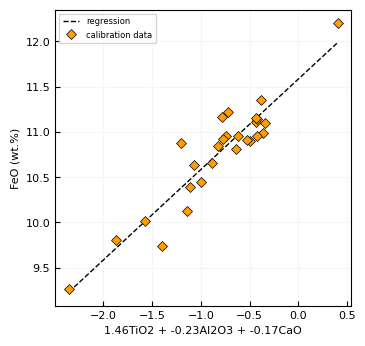

In [8]:
x = wholerock.drop(columns=["FeO"])
FeOi_predict = mpc.FeOi_prediction(x=x, FeO=wholerock["FeO"])

do_not_use = ["MnO", "P2O5", "Cr2O3", "total"]

model_fits = FeOi_predict.calculate_model_fits(exclude=do_not_use)
FeOi_predict.select_predictors(idx=3)

In [9]:
FeOi_predict.coefficients

intercept    11.585125
TiO2          1.463365
Al2O3        -0.230722
CaO          -0.169262
dtype: float64

To use this model during PEC correction, we need to store this model as a callable function, which we can do with the *model* attribute:

In [10]:
FeO_model = FeOi_predict.model

Let's first quickly test the model by predicting FeO contents for our uncorrected melt compositions:

In [11]:
FeO_model(melt)

name
PI032-04-01    10.196984
PI032-04-02    10.265411
PI041-02-02    10.221895
PI041-03-01    10.614069
PI041-03-03    10.716794
PI041-05-04     9.420381
PI041-05-06    11.476340
PI041-07-01    11.608516
PI041-07-02    11.451018
PI052-01-02     8.722012
dtype: float32

This all looks good, so let continue with setting up the PEC correction model.

First, preview the melt and olivine data to check everything looks ok:

In [12]:
melt.head()

,SiO2,Al2O3,MgO,CaO,FeO,Na2O,K2O,MnO,TiO2,P2O5,Cr2O3,CO2,H2O,F,S,Cl
name,,,,,,,,,,,,,,,,
PI032-04-01,50.028862,15.226979,5.330006,10.522019,8.59454,3.914280,0.730798,0.126266,2.669216,0.303542,NaN,0.658252,1.508379,0.082590,0.152337,0.035565
PI032-04-02,49.558861,16.041588,5.117479,10.266067,8.25471,3.782408,0.997826,0.129969,2.814807,0.356900,NaN,0.713472,1.412274,0.089010,0.175511,0.047265
PI041-02-02,49.112045,16.972038,4.864153,9.195718,10.07540,3.793512,1.079184,0.153456,2.807967,0.561756,NaN,0.464520,0.656341,0.047715,0.068108,0.021185
PI041-03-01,47.098515,17.448515,4.650640,12.154110,7.95402,3.707263,1.268282,0.101370,3.493271,0.611504,NaN,0.883720,0.324968,0.088070,0.096228,0.059958
PI041-03-03,46.478870,17.637102,4.762752,12.364033,7.84027,3.789446,1.294603,0.077221,3.617484,0.574248,NaN,0.910470,0.344988,0.090605,0.088145,0.061584


In [13]:
olivine.head()

,SiO2,FeO,MgO,NiO,MnO,Al2O3,CaO,total
name,,,,,,,,
PI032-04-01,38.204800,15.981400,44.194000,0.172665,0.234256,0.005229,0.240552,99.032906
PI032-04-02,38.638500,15.898400,43.467400,0.188024,0.219599,-0.007310,0.234622,98.639236
PI041-02-02,37.270100,20.815901,41.015099,0.104744,0.293681,0.016547,0.214939,99.731003
PI041-03-01,38.795799,15.469300,44.750999,0.180198,0.212197,0.031333,0.259919,99.699745
PI041-03-03,38.701900,15.782500,44.920799,0.164372,0.214836,0.037263,0.275049,100.096718


Make sure that each row in *melt* and *olivine* is a matching pair of melt inclusion and olivine host. Here we use the sample names stored in the indices of both dataframes:

In [14]:
print(melt.index, "\n\n", olivine.index)

Index(['PI032-04-01', 'PI032-04-02', 'PI041-02-02', 'PI041-03-01',
       'PI041-03-03', 'PI041-05-04', 'PI041-05-06', 'PI041-07-01',
       'PI041-07-02', 'PI052-01-02'],
      dtype='object', name='name') 

 Index(['PI032-04-01', 'PI032-04-02', 'PI041-02-02', 'PI041-03-01',
       'PI041-03-03', 'PI041-05-04', 'PI041-05-06', 'PI041-07-01',
       'PI041-07-02', 'PI052-01-02'],
      dtype='object', name='name')


We can verify that the indices are the same with the *equals* method:

In [15]:
melt.index.equals(olivine.index)

True

Confirm the model and PEC configurations. If you want to change models or PEC settings, follow the [configuration example](https://magmapec.readthedocs.io/en/latest/notebooks/config.html).

In [16]:
print(mpc.model_configuration)
print(mpc.PEC_configuration)


################## MagmaPandas ###################
##################################################
General settings__________________________________
fO2 buffer.....................................QFM
ΔfO2.............................................1
Melt Fe3+/Fe2+.............................sun2024
Kd Fe-Mg ol-melt........................toplis2005
Melt thermometer....................putirka2008_15
Volatile solubility model.......iaconomarziano2012
Volatile species.............................mixed
##################################################


############ Post-entrapment crystallisation ############
################### correction model ####################
Settings_________________________________________________
Fe2+ behaviour...................................buffered
Stepsize equilibration (moles)...................0.002   
Stepsize crystallisation (moles).................0.05    
Decrease factor..................................5       
FeO convergence (wt. %).......

Now we can initialise the PEC model, where we need the following data:

- **inclusions**

    inclusion major element compositions in oxide wt. % as a MagmaPandas Melt frame.

- **olivines**

    olivine major element compositions in oxide wt. % as a MagmaPandas Olivine frame.

- **P_bar**

    pressures in bar at which to run the model. You can use a fixed pressure for all inclusions, e.g. *P_bar=2e3* for 2 kbar, or indicate specific pressures per inclusion. In this example we do the latter, by passing the above imported pandas Series with internal inclusion pressures

- **FeO_target**

    Estimated initial FeO contents of melt inclusions. You can use a fixed value for all melt inclusions, e.g. FeO = 11, specific values for individual melt inclusions, stored in a pandas Series, or a predictive equation based on melt major element composition. This equation needs to be a callable function that accepts a Pandas DataFrame with melt compositions in oxide wt. % as input and return an array-like object with initial FeO contents per inclusion. In the example above we showed how to set up a function like this using MagmaPEC.

In [17]:
pec_model = mpc.PEC(inclusions=melt, olivines=olivine, P_bar=pressure, FeO_target=FeO_model)

Now we simply run the model with the *correct* method. It runs in two stages: the first stage equilibrates Fe and Mg between melt inclusions and olivine hosts through Fe-Mg cation exchange and the second stage corrects melt inclusions back to their initial FeO contents by melting or crystallising olivine.

This method returns three objects:

- corrected melt compositions as a MagmaPandas Melt frame

- PEC extents as a pandas DataFrame
    
- checks to confirm the inclusions have equilibrated and reached FeOi

in equilibration_vector.py line 167, iterrows() now returns pandas series instead of MagmaSeries. _constructor_sliced needs to be modified to fix that

In [18]:
melts_corrected, pec, checks = pec_model.correct()


Equilibrating ... |██████████████████████████████| 100% [10/10] in 6.7s 
Correcting    ... |██████████████████████████████| 100% [10/10] in 19.8s 


The `checks` dataframe shows that isothermal equilibration during stage [1], Kd equilibration in stage [2], and FeO convergence in stage [2] were successful for all inclusions. This is the expected result, but during [Monte Carlo error propagation](https://magmapec.readthedocs.io/en/latest/notebooks/pec_mc.html), extreme cases of random error sampling may yield melt-olivine pairs that cannot be equilibrated without requiring crystallising exceeding the mass of the inclusion inclusion or exchange of more Mg or Fe than the inclusion contains. If that is the case, no corrected compositions are calculated and the isothermal- of Kd-equilibration column is set to *False*.

In [19]:
checks

,isothermal_equilibration,Kd_equilibration,FeO_converge
name,,,
PI032-04-01,True,True,True
PI032-04-02,True,True,True
PI041-02-02,True,True,True
PI041-03-01,True,True,True
PI041-03-03,True,True,True
PI041-05-04,True,True,True
PI041-05-06,True,True,True
PI041-07-01,True,True,True
PI041-07-02,True,True,True


The `pec` dataframe has three columns:

- equilibration_crystallisation: 
    
    crystallisation extents during the equilibration stage.

- PE_crystallisation:

    crystallisation extents during the crystallisation stage.

- total_crystallisation:

    total amount of post-entrapment crystallisation

with all data in percent and positive values indicating post-entrapment crystallisation and negative melting

In [20]:
pec

,equilibration_crystallisation,PE_crystallisation,total_crystallisation
name,,,
PI032-04-01,-2.603516,12.4,9.796851
PI032-04-02,-2.193359,13.0,10.807312
PI041-02-02,-0.405518,0.4,-0.005502
PI041-03-01,-1.754883,14.4,12.645239
PI041-03-03,-0.868164,13.0,12.131775
PI041-05-04,-1.603516,-2.8,-4.403699
PI041-05-06,-1.605469,3.6,1.994775
PI041-07-01,-2.988281,15.2,12.212329
PI041-07-02,-1.681641,12.8,11.118481


These crystallization extents result in the following corrected melt compositions:

In [21]:
melts_corrected

,SiO2,Al2O3,MgO,CaO,FeO,Na2O,K2O,MnO,TiO2,P2O5,Cr2O3,CO2,H2O,F,S,Cl,total
name,,,,,,,,,,,,,,,,,
PI032-04-01,48.931758,13.998598,7.676413,9.696297,10.314543,3.598378,0.671819,0.138918,2.453798,0.279044,0.000000,0.605128,1.386646,0.075925,0.140043,0.032695,100.0
PI032-04-02,48.477480,14.628877,7.541123,9.386328,10.350319,3.449483,0.909998,0.140873,2.567050,0.325486,0.000000,0.650673,1.287967,0.081176,0.160063,0.043104,100.0
PI041-02-02,49.150270,16.987606,4.816300,9.204823,10.177479,3.796980,1.080170,0.154551,2.810533,0.562269,0.000000,0.464944,0.656941,0.047759,0.068170,0.021204,100.0
PI041-03-01,45.917206,15.664742,7.208409,10.936977,10.704627,3.327557,1.138382,0.113616,3.135482,0.548873,0.000000,0.793207,0.291684,0.079049,0.086372,0.053817,100.0
PI041-03-03,45.331347,15.888018,7.026156,11.161789,10.801348,3.412875,1.165953,0.090181,3.258002,0.517183,0.000000,0.819993,0.310706,0.081601,0.079386,0.055464,100.0
PI041-05-04,47.861750,18.767904,3.606197,9.486395,9.278998,4.643904,1.622232,0.136676,2.510777,0.833213,0.000000,0.515009,0.466125,0.088609,0.122617,0.059593,100.0
PI041-05-06,46.422057,17.057608,4.659523,8.968947,11.468577,4.022350,1.424099,0.168946,3.652677,0.622667,0.000000,0.643356,0.588748,0.107968,0.128776,0.063701,100.0
PI041-07-01,45.800372,15.243442,7.279566,9.691332,11.555568,3.132808,1.273257,0.148874,3.534937,0.555245,0.000000,0.468043,1.021510,0.075151,0.163533,0.056363,100.0
PI041-07-02,45.865123,15.594001,6.875621,10.088217,11.467293,3.193868,1.361996,0.136368,3.539193,0.616885,0.000000,0.372682,0.617054,0.073673,0.140583,0.057442,100.0


Results are also stored in the pec object and can be accessed via the `inclusions` and `olivine_corrected` attributes.

In [22]:
pec_model.inclusions

,SiO2,Al2O3,MgO,CaO,FeO,Na2O,K2O,MnO,TiO2,P2O5,Cr2O3,CO2,H2O,F,S,Cl,total
name,,,,,,,,,,,,,,,,,
PI032-04-01,48.931758,13.998598,7.676413,9.696297,10.314543,3.598378,0.671819,0.138918,2.453798,0.279044,0.000000,0.605128,1.386646,0.075925,0.140043,0.032695,100.0
PI032-04-02,48.477480,14.628877,7.541123,9.386328,10.350319,3.449483,0.909998,0.140873,2.567050,0.325486,0.000000,0.650673,1.287967,0.081176,0.160063,0.043104,100.0
PI041-02-02,49.150270,16.987606,4.816300,9.204823,10.177479,3.796980,1.080170,0.154551,2.810533,0.562269,0.000000,0.464944,0.656941,0.047759,0.068170,0.021204,100.0
PI041-03-01,45.917206,15.664742,7.208409,10.936977,10.704627,3.327557,1.138382,0.113616,3.135482,0.548873,0.000000,0.793207,0.291684,0.079049,0.086372,0.053817,100.0
PI041-03-03,45.331347,15.888018,7.026156,11.161789,10.801348,3.412875,1.165953,0.090181,3.258002,0.517183,0.000000,0.819993,0.310706,0.081601,0.079386,0.055464,100.0
PI041-05-04,47.861750,18.767904,3.606197,9.486395,9.278998,4.643904,1.622232,0.136676,2.510777,0.833213,0.000000,0.515009,0.466125,0.088609,0.122617,0.059593,100.0
PI041-05-06,46.422057,17.057608,4.659523,8.968947,11.468577,4.022350,1.424099,0.168946,3.652677,0.622667,0.000000,0.643356,0.588748,0.107968,0.128776,0.063701,100.0
PI041-07-01,45.800372,15.243442,7.279566,9.691332,11.555568,3.132808,1.273257,0.148874,3.534937,0.555245,0.000000,0.468043,1.021510,0.075151,0.163533,0.056363,100.0
PI041-07-02,45.865123,15.594001,6.875621,10.088217,11.467293,3.193868,1.361996,0.136368,3.539193,0.616885,0.000000,0.372682,0.617054,0.073673,0.140583,0.057442,100.0


In [23]:
pec_model.olivine_corrected

,equilibration_crystallisation,PE_crystallisation,total_crystallisation
name,,,
PI032-04-01,-2.603516,12.4,9.796851
PI032-04-02,-2.193359,13.0,10.807312
PI041-02-02,-0.405518,0.4,-0.005502
PI041-03-01,-1.754883,14.4,12.645239
PI041-03-03,-0.868164,13.0,12.131775
PI041-05-04,-1.603516,-2.8,-4.403699
PI041-05-06,-1.605469,3.6,1.994775
PI041-07-01,-2.988281,15.2,12.212329
PI041-07-02,-1.681641,12.8,11.118481


pressures, temperatures, ol-melt Fe-Mg Kd (current inclusion value, not modelled), melt Fe3Fe2, and fO2 of corrected  and uncorrected inclusions can be calculated with the `get_PTX` method. Pressures can be inputted as a method argument, or calculated as entrapment pressures with H2O-CO2 solubility models if concentrations for those elements are available.

In [24]:
# with fixed pressures 
ptx_1bar = pec_model.get_PTX(P_bar=1)
ptx_1bar

Fe3Fe2                    Kd                 P_bar              \
            corrected uncorrected corrected uncorrected corrected uncorrected   
name                                                                            
PI032-04-01  0.188707    0.178602  0.319915    0.264316         1           1   
PI032-04-02  0.190549    0.178294  0.317263    0.267176         1           1   
PI041-02-02  0.227242    0.226382  0.294751    0.300484         1           1   
PI041-03-01  0.262410    0.247293  0.293857    0.252094         1           1   
PI041-03-03  0.268013    0.250184  0.289796    0.266827         1           1   
PI041-05-04  0.255278    0.269758  0.274488    0.259831         1           1   
PI041-05-06  0.251762    0.249761  0.285880    0.268891         1           1   
PI041-07-01  0.218306    0.204438  0.305101    0.250548         1           1   
PI041-07-02  0.246088    0.231809  0.294981    0.259206         1           1   
PI052-01-02  0.222466    0.249766  0.286341    0.245094         1           1   

                     T_K                     fO2_Pa                
               corrected  uncorrected     corrected   uncorrected  
name                                                               
PI032-04-01  1457.224238  1395.488794  2.514881e-08  4.262862e-09  
PI032-04-02  1455.928031  1391.605641  2.426294e-08  3.794287e-09  
PI041-02-02  1395.578651  1396.965854  4.274333e-09  4.455222e-09  
PI041-03-01  1462.190071  1392.912964  2.883712e-08  3.946251e-09  
PI041-03-03  1458.446689  1396.671131  2.601251e-08  4.416189e-09  
PI041-05-04  1368.094432  1384.513171  1.850474e-09  3.062590e-09  
PI041-05-06  1398.976578  1385.746363  4.730457e-09  3.179285e-09  
PI041-07-01  1456.448592  1387.774688  2.461506e-08  3.380520e-09  
PI041-07-02  1452.391339  1394.223449  2.199493e-08  4.104411e-09  
PI052-01-02  1369.139908  1397.202337  1.911440e-09  4.486780e-09

In [25]:
# with entrapment pressures calculated from inclusions CO2-H2O
ptx = pec_model.get_PTX()
ptx

Saturation pressure...    |█████████████████████████| 100% [10/10] in 2.1s 
Saturation pressure...    |█████████████████████████| 100% [10/10] in 2.0s 
Saturation pressure...    |█████████████████████████| 100% [10/10] in 2.1s 
Saturation pressure...    |█████████████████████████| 100% [10/10] in 2.4s 
Saturation pressure...    |█████████████████████████| 100% [10/10] in 3.8s 
Saturation pressure...    |█████████████████████████| 100% [10/10] in 3.4s 
Saturation pressure...    |█████████████████████████| 100% [10/10] in 3.3s 
Saturation pressure...    |█████████████████████████| 100% [10/10] in 3.5s 
Saturation pressure...    |█████████████████████████| 100% [10/10] in 3.3s 


Fe3Fe2                    Kd                    P_bar  \
            corrected uncorrected corrected uncorrected    corrected   
name                                                                   
PI032-04-01  0.170581    0.158949  0.315037    0.259909  5615.105531   
PI032-04-02  0.170426    0.160329  0.311900    0.263102  6539.207337   
PI041-02-02  0.208505    0.207741  0.290251    0.295917  4802.704675   
PI041-03-01  0.239178    0.223352  0.288449    0.247255  6444.492208   
PI041-03-03  0.243432    0.224927  0.284178    0.261436  6346.014723   
PI041-05-04  0.233976    0.246523  0.269830    0.255077  4149.081003   
PI041-05-06  0.229090    0.227719  0.280703    0.264149  5197.309478   
PI041-07-01  0.202829    0.188507  0.301225    0.247234  4429.331516   
PI041-07-02  0.229221    0.212882  0.290988    0.255224  3801.216987   
PI052-01-02  0.207545    0.237972  0.282846    0.242781  2581.149109   

                                  T_K                     fO2_Pa                
             uncorrected    corrected  uncorrected     corrected   uncorrected  
name                                                                            
PI032-04-01  6537.215656  1481.152191  1421.055549  1.213766e-07  2.773475e-08  
PI032-04-02  6844.720943  1481.531633  1418.632866  1.426248e-07  2.730719e-08  
PI041-02-02  4806.074256  1414.382126  1415.782524  1.704781e-08  1.775339e-08  
PI041-03-01  6959.958721  1487.422787  1420.164238  1.636735e-07  2.907688e-08  
PI041-03-03  6828.606410  1483.293766  1423.408030  1.446803e-07  3.113879e-08  
PI041-05-04  4019.235493  1384.338317  1400.248581  6.331567e-09  9.896748e-09  
PI041-05-06  5276.607931  1419.325326  1406.408389  2.099857e-08  1.471747e-08  
PI041-07-01  4968.682766  1475.872867  1407.228133  8.691853e-08  1.428748e-08  
PI041-07-02  4179.238377  1467.272989  1410.585431  6.228765e-08  1.373113e-08  
PI052-01-02  2393.387486  1379.243772  1406.570927  4.120173e-09  8.973845e-09